<center><h1><b> Real Estate Trends in the States</b></h1></center>

## Authors
* Sundara Swani Didde, sudi2327@colorado.edu
* Jeet Ashwin Shah,    jesh5710@colorado.edu

## Introduction
<p style='text-align: justify;'>Real estate has always played a dominant role in society and also has become expensive with the growing economy. From choosing the right city and the right time to invest to the demographic aspects that determine the value of the investment later in the years. Hence, knowing the market prices gives many an opportunity to negotiate and avoid overpaying.</p>

## Goal Of The Project
How can data science be applied for real estate market analysis?

## Initial Setup
We will begin by importing several essential libraries, including `pandas`, `numpy`, `plotly.express`, and `matplotlib`. These libraries are indispensable for tasks related to data manipulation, data cleansing, and data visualization.

In [58]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

## Dataset
Data provided by Redfin, a national real estate brokerage. Redfin has direct access to data from multiple local listing services. The data provided gives us the most reliable data on the housing market. This dataseet consists of 58 features. For this project, we have used the following 4 main features for our analysis:

`state`: This comprises the names of the states within the United States of America.

`property_type`: This categorizes properties into five major types: 'Townhouse', 'Single Family Residential', 'Multi-Family (2-4 Unit)', 'Condo/Co-op', and 'All Residential'.

`median_sale_price`: Within this, you will find the median sale prices of houses that were sold within the specified state.

`homes_sold`: This provides information regarding the number of houses that were sold.


Link for the Dataset : https://www.redfin.com/news/data-center/

In [59]:
df = pd.read_csv('state_market_tracker.tsv000',sep='\t')
df.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2012-08-01,2012-08-31,30,state,4,33,f,Iowa,NaN,Iowa,...,0.066667,NaN,NaN,NaN,0.000000,0.000000,0.000000,Midwest Region,NaN,2023-09-10 14:22:34
1,2021-02-01,2021-02-28,30,state,4,42,f,Virginia,NaN,Virginia,...,0.227633,0.142857,0.064117,0.060213,0.305455,-0.130319,-0.295264,South Region,NaN,2023-09-10 14:22:34
2,2021-04-01,2021-04-30,30,state,4,49,f,Minnesota,NaN,Minnesota,...,0.156430,0.138517,-0.006933,-0.036480,0.648354,-0.013401,0.214179,Midwest Region,NaN,2023-09-10 14:22:34
3,2015-10-01,2015-10-31,30,state,4,2,f,Missouri,NaN,Missouri,...,0.012556,0.217196,0.001813,0.217111,0.130876,-0.002263,0.108191,Midwest Region,NaN,2023-09-10 14:22:34
4,2014-01-01,2014-01-31,30,state,4,6,f,Nebraska,NaN,Nebraska,...,0.011383,NaN,NaN,NaN,0.378996,0.072626,0.046567,Midwest Region,NaN,2023-09-10 14:22:34


## Data Cleaning
* In the cleaning process, we will remove the additional features which are not required for our analysis and remove all null values.

In [60]:
df=df[['period_begin','state','state_code','property_type','median_sale_price','homes_sold']]
df.head()

,period_begin,state,state_code,property_type,median_sale_price,homes_sold
0,2012-08-01,Iowa,IA,Multi-Family (2-4 Unit),58500,15
1,2021-02-01,Virginia,VA,Multi-Family (2-4 Unit),225300,44
2,2021-04-01,Minnesota,MN,All Residential,308300,6959
3,2015-10-01,Missouri,MO,Single Family Residential,154600,4358
4,2014-01-01,Nebraska,NE,All Residential,135100,965


* For our analysis, we have exclusively considered data from the year 2022.

In [61]:
df=df[(df['period_begin']=='2022-01-01')]
df.head()

,period_begin,state,state_code,property_type,median_sale_price,homes_sold
150,2022-01-01,Missouri,MO,Townhouse,189100,44
288,2022-01-01,Tennessee,TN,Single Family Residential,334100,6339
505,2022-01-01,Nebraska,NE,Multi-Family (2-4 Unit),479500,11
668,2022-01-01,Missouri,MO,Condo/Co-op,189200,338
772,2022-01-01,Mississippi,MS,All Residential,234600,1297


* Now, we will generate a new DataFrame for our analysis using the cleaned data.

In [62]:
df1=df[['state','property_type','median_sale_price','homes_sold']]
df1.head()

,state,property_type,median_sale_price,homes_sold
150,Missouri,Townhouse,189100,44
288,Tennessee,Single Family Residential,334100,6339
505,Nebraska,Multi-Family (2-4 Unit),479500,11
668,Missouri,Condo/Co-op,189200,338
772,Mississippi,All Residential,234600,1297


## Data Manipulation
Before proceeding with data visualizations, we will concentrate exclusively on one property type: `Single Family Residential`, and arrange the data accordingly. This approach aims to enhance the clarity and simplicity of data interpretation.

In [63]:
df = df[(df['property_type']=='Single Family Residential')]
sorted_df = df.sort_values(by='homes_sold')
sorted_df.head()

,period_begin,state,state_code,property_type,median_sale_price,homes_sold
10373,2022-01-01,Columbia,DC,Single Family Residential,849900,82
8089,2022-01-01,North Dakota,ND,Single Family Residential,266600,179
31493,2022-01-01,West Virginia,WV,Single Family Residential,294600,287
29942,2022-01-01,Vermont,VT,Single Family Residential,347200,457
11253,2022-01-01,Delaware,DE,Single Family Residential,338900,461


## Exploring Data Through Visualization

Let us conduct a comparison of sales within the `Single Family Residential` property type across different states.

Text(0.5, 1.0, 'Single Family Residential')

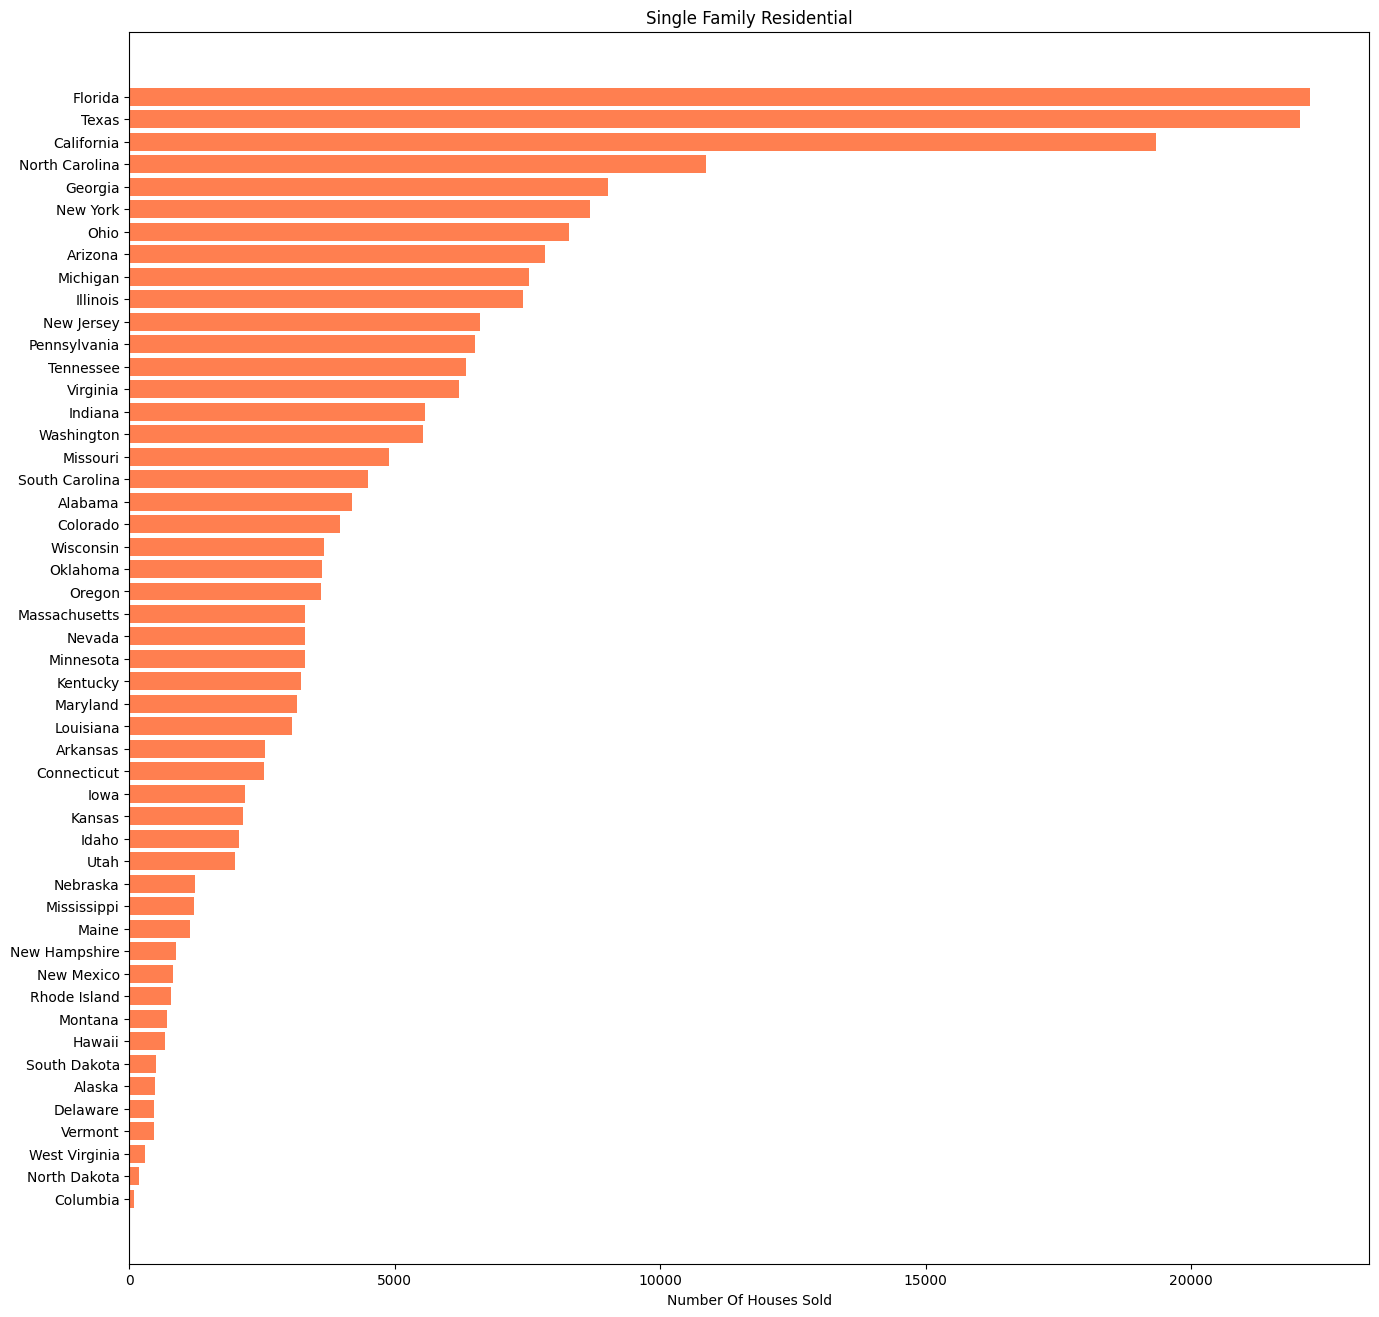

In [64]:
plt.figure(figsize=(16, 16))
plt.barh(sorted_df['state'],sorted_df['homes_sold'],color='coral')
plt.xlabel('Number Of Houses Sold')
plt.title('Single Family Residential')

**From the graph above we understand that most sales of `Single Family Residential` occurs in Florida and least in Columbia for the year 2022.**

Similarly, we will examine the trends in median house prices for properties sold in various states.

In [65]:
fig = px.choropleth(df,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='median_sale_price',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.update_layout(
      title_text = 'Median House Prices by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

**From this visual, we get a gist that the western part of the country is expensive in comparision to the eastern part. While Hawaii had the highest median sale price for each house sold.**

Let us find which type of property is sold the most 

<AxesSubplot: ylabel='homes_sold'>

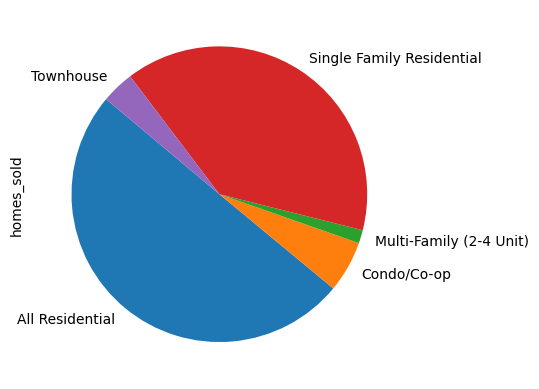

In [66]:
grouped_property = df1.groupby('property_type')['homes_sold'].sum() #To group the property and find the total number of houses for each category.
grouped_property.plot(kind='pie', startangle=140)

**From this graph we understand that `All Residential` type was most sold throughout the United State in year 2022**

## Data Analysis

* Let us determine which state has recorded the highest number of houses sold across all types of properties.

In [67]:
grouped_state = df1.groupby(['state'])['homes_sold'].sum()
print(grouped_state.sort_values(ascending=False))

state
Florida           66171
California        49982
Texas             48103
New York          26513
North Carolina    25242
Illinois          21687
Georgia           21053
Pennsylvania      20832
Ohio              19355
Arizona           18833
Michigan          17761
New Jersey        17664
Virginia          17046
Tennessee         14122
Washington        13526
Indiana           11909
South Carolina    11595
Maryland          11583
Colorado          11259
Missouri          10804
Massachusetts     10577
Alabama            9280
Wisconsin          8966
Nevada             8504
Minnesota          8457
Oregon             8405
Oklahoma           7559
Connecticut        7224
Kentucky           7119
Louisiana          6625
Utah               5536
Arkansas           5402
Iowa               5042
Kansas             4579
Idaho              4461
Hawaii             2813
Nebraska           2672
Maine              2634
Mississippi        2561
New Hampshire      2483
Rhode Island       2244
New Mexico

**`Florida` has the highest number of sales**

* Let us find out the sector in Florida` that has given thehighest number of sales.

In [68]:
grouped = df1.groupby(['state', 'property_type'])['homes_sold'].sum()
print(grouped['Florida'])

property_type
All Residential              33118
Condo/Co-op                   7710
Multi-Family (2-4 Unit)        465
Single Family Residential    22246
Townhouse                     2632
Name: homes_sold, dtype: int64


**From this we can understand that `All Residential` brings the highest number of sales**

* Let us find out which state has the highest number of `All Residential Sales`

In [69]:
AR_grouped = grouped[grouped.index.get_level_values('property_type') == 'All Residential'].sort_values(ascending=False)
print(AR_grouped)

state           property_type  
Florida         All Residential    33118
California      All Residential    25023
Texas           All Residential    24090
New York        All Residential    13270
North Carolina  All Residential    12659
Illinois        All Residential    10874
Georgia         All Residential    10558
Pennsylvania    All Residential    10431
Ohio            All Residential     9708
Arizona         All Residential     9420
Michigan        All Residential     8905
New Jersey      All Residential     8833
Virginia        All Residential     8555
Tennessee       All Residential     7086
Washington      All Residential     6775
Indiana         All Residential     5978
South Carolina  All Residential     5808
Maryland        All Residential     5797
Colorado        All Residential     5638
Missouri        All Residential     5420
Massachusetts   All Residential     5292
Alabama         All Residential     4644
Wisconsin       All Residential     4496
Nevada          All Resid

**Hence, `Florida` has the highest sales among all the states**

## Conclusion and Bias
We can derive a number of conclusions from the data analysis shown above. Particularly, Florida emerges as a significant market for real estate transactions. The observation that Florida's median home prices roughly match the national average serves as support for this judgement. Florida therefore displays a higher rate of real estate investment activity than other states. This pattern can be seen in a variety of property kinds, such as "All Residential" and "Single Family Residential" homes.

It is vital to understand that the dataset's values determine whether or not these findings hold true. Any changes to the data, such as the inclusion of new numbers or adjustments, may have an effect on the patterns and conclusions that have been detected.


## Citations

* https://dspace.mit.edu/bitstream/handle/1721.1/129099/1227098997-MIT.pdf?sequence=1&isAllowed=y

* https://www.knowledgehut.com/blog/data-science/data-science-in-real-estate

* https://www.redfin.com/news/data-center/
